In [44]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

In [45]:
# Generate some data
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=400, centers=4,
                       cluster_std=0.60, random_state=0)
X = X[:, ::-1] # flip axes for better plotting

/Users/samuelspeller/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


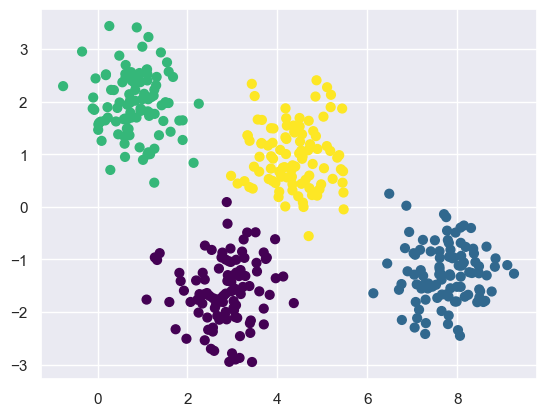

In [46]:
# Plot the data with K Means Labels
from sklearn.cluster import KMeans
kmeans = KMeans(4, random_state=0)
labels = kmeans.fit(X).predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');

In [47]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

def plot_kmeans(kmeans, X, n_clusters=4, rseed=0, ax=None):
    labels = kmeans.fit_predict(X)

    # plot the input data
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)

    # plot the representation of the KMeans model
    centers = kmeans.cluster_centers_
    radii = [cdist(X[labels == i], [center]).max()
             for i, center in enumerate(centers)]
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))

/Users/samuelspeller/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


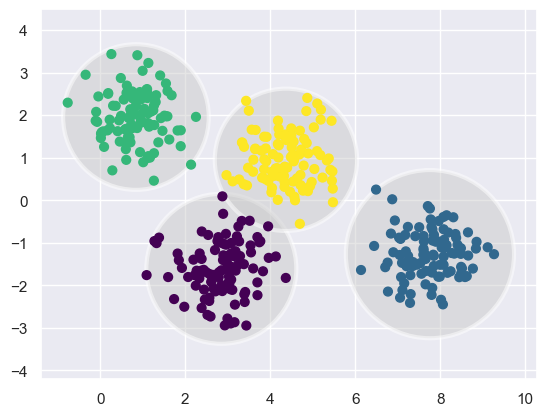

In [48]:
kmeans = KMeans(n_clusters=4, random_state=0)
plot_kmeans(kmeans, X)

/Users/samuelspeller/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


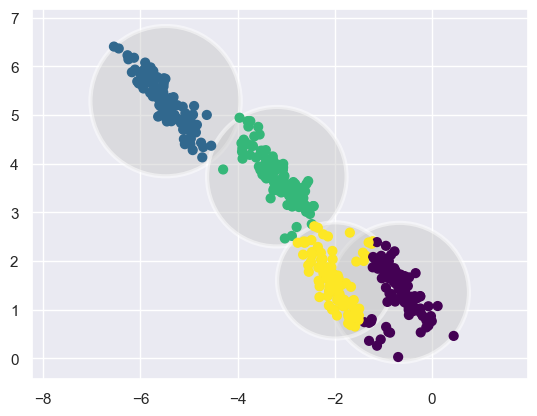

In [49]:
rng = np.random.RandomState(13)
X_stretched = np.dot(X, rng.randn(2, 2))

kmeans = KMeans(n_clusters=4, random_state=0)
plot_kmeans(kmeans, X_stretched)

## Generalizing E–M: Gaussian Mixture Models

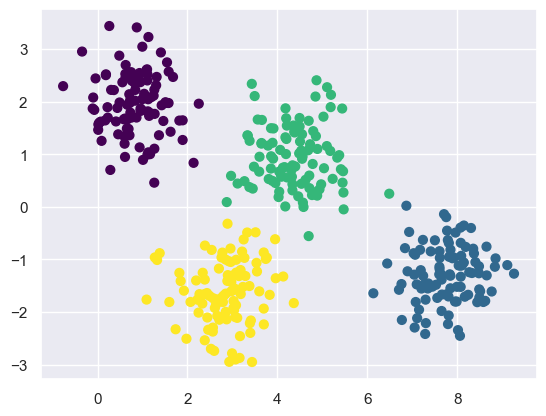

In [50]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=4).fit(X)
labels = gmm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis')

In [51]:
probs = gmm.predict_proba(X)
print(X[:5])
print(probs[:5].round(3))

# top print is the coordinates of the first 5 data points
# second print, each line represents a data point and the probability of being in one of the 4 clusters

[[ 6.48826703  0.25006446]
 [ 2.52194722 -2.69798647]
 [ 3.06877291 -2.90007604]
 [ 4.31427482  0.70295058]
 [ 2.38449945 -2.53563494]]
[[0.    0.469 0.531 0.   ]
 [0.    0.    0.    1.   ]
 [0.    0.    0.    1.   ]
 [0.    0.    1.    0.   ]
 [0.    0.    0.    1.   ]]


In [52]:
X[1]

array([ 2.52194722, -2.69798647])

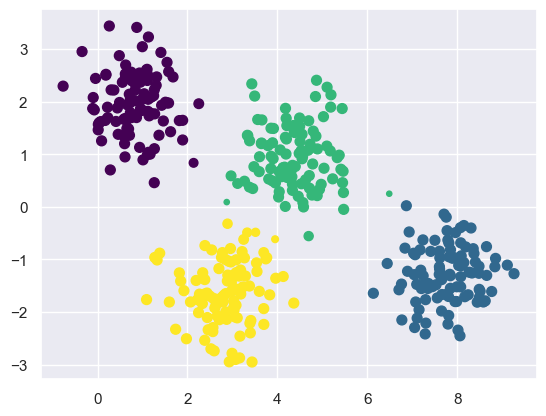

In [53]:
size = 50 * probs.max(1) ** 2  # square emphasizes differences
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=size);

In [54]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

/var/folders/t7/n_c5tq1n0h985pbhlhf2w0c80000gn/T/ipykernel_36556/1887141402.py:18: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ax.add_patch(Ellipse(position, nsig * width, nsig * height,


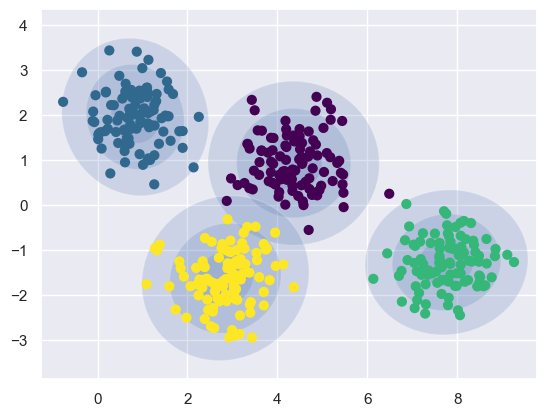

In [55]:
gmm = GaussianMixture(n_components=4, random_state=42)
plot_gmm(gmm, X)

/var/folders/t7/n_c5tq1n0h985pbhlhf2w0c80000gn/T/ipykernel_36556/1887141402.py:18: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ax.add_patch(Ellipse(position, nsig * width, nsig * height,


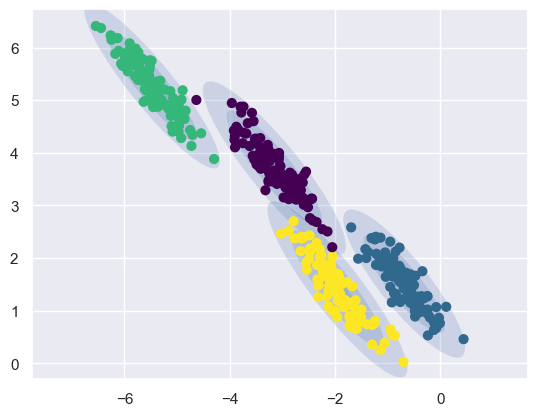

In [56]:
gmm = GaussianMixture(n_components=4, covariance_type='full', random_state=42)
plot_gmm(gmm, X_stretched)

## GMM as Density Estimation

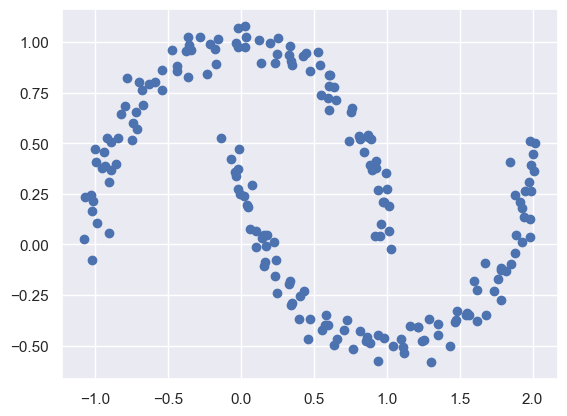

In [57]:
from sklearn.datasets import make_moons
Xmoon, ymoon = make_moons(200, noise=.05, random_state=0)
plt.scatter(Xmoon[:, 0], Xmoon[:, 1]);

/var/folders/t7/n_c5tq1n0h985pbhlhf2w0c80000gn/T/ipykernel_36556/1887141402.py:18: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ax.add_patch(Ellipse(position, nsig * width, nsig * height,


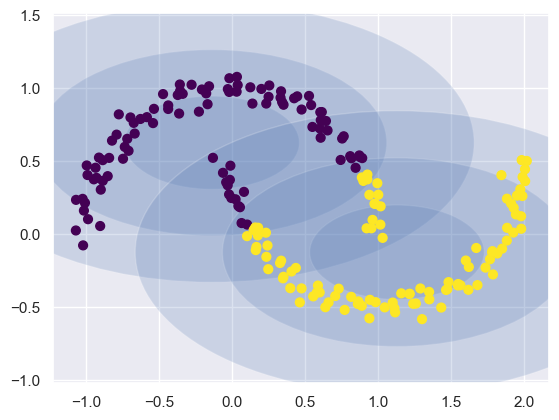

In [58]:
gmm2 = GaussianMixture(n_components=2, covariance_type='diag', random_state=0)
plot_gmm(gmm2, Xmoon)

/var/folders/t7/n_c5tq1n0h985pbhlhf2w0c80000gn/T/ipykernel_36556/1887141402.py:18: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ax.add_patch(Ellipse(position, nsig * width, nsig * height,


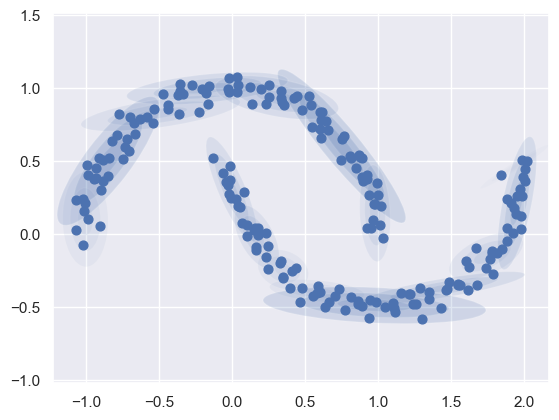

In [59]:
gmm16 = GaussianMixture(n_components=16, covariance_type='full', random_state=0)
plot_gmm(gmm16, Xmoon, label=False)

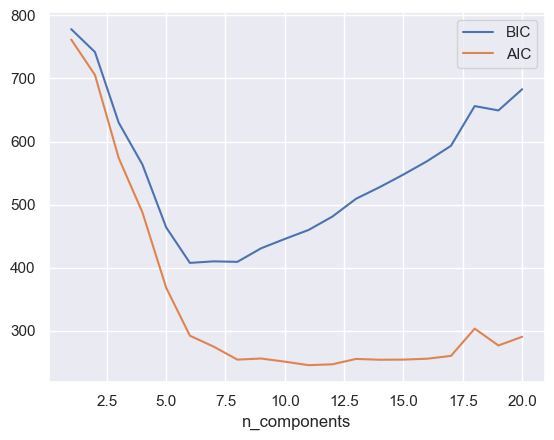

In [60]:
n_components = np.arange(1, 21)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(Xmoon)
          for n in n_components]

plt.plot(n_components, [m.bic(Xmoon) for m in models], label='BIC')
plt.plot(n_components, [m.aic(Xmoon) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

## Dimensionality Reduction with PCA

In [61]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

In [62]:
data = pd.read_csv('wine.csv')

In [63]:
model = PCA()
model.fit(data)

PCA()

In [64]:
transformed = model.transform(data)

In [65]:
transformed

array([[ 3.04899963e+02, -5.14076193e+00,  6.83973518e+00, ...,
         9.44495225e-02, -4.54050950e-02,  2.05784890e-02],
       [ 4.39864419e+02, -6.24036973e+00, -1.03818696e+00, ...,
         1.80274570e-01, -5.06361137e-02, -3.84562238e-02],
       [ 7.35040360e+02,  6.06511153e-01, -8.78818354e-01, ...,
        -5.22615680e-02, -1.57418485e-01,  2.32779917e-02],
       ...,
       [ 9.02487636e+01,  1.89421016e+01, -2.35773662e+00, ...,
        -2.04954387e-01,  8.52423386e-02,  3.54154651e-02],
       [ 9.52469458e+01,  1.88377222e+01, -1.89210731e+00, ...,
         3.81172922e-03, -4.68557108e-02,  1.38439995e-01],
       [-1.85144473e+02, -1.50230204e-01, -5.73273209e+00, ...,
         3.60230201e-02,  1.60991570e-02,  1.95739931e-02]])

In [66]:
model.components_

array([[-1.55124279e-03,  1.64640028e-03, -6.73506707e-04,
         1.94876719e-04, -4.62714846e-03,  1.74715140e-02,
         9.86351833e-04,  1.55753943e-03, -1.22303371e-04,
         5.91287116e-04,  2.33004374e-03,  1.70868495e-04,
         6.85049512e-04,  9.99829003e-01],
       [ 3.15432737e-03,  7.17665214e-04,  2.50539607e-03,
         4.67124259e-03,  2.87367564e-02,  9.99274600e-01,
         7.44756954e-04, -4.56932866e-04, -1.34228446e-03,
         4.70862302e-03,  1.54997593e-02, -7.99499499e-04,
        -4.34883705e-03, -1.73603213e-02],
       [-1.00574347e-01, -1.98658968e-02, -1.24480733e-01,
        -5.14104489e-02, -9.27759647e-01,  3.24177949e-02,
         4.26507697e-02,  8.97401456e-02, -1.37799589e-02,
         2.55915634e-02, -3.04670027e-01,  2.70967693e-02,
         7.25697170e-02, -4.60029325e-03],
       [-1.47625764e-01, -1.36740183e-01, -1.56650736e-01,
         1.21258683e-02,  3.58018196e-01,  4.52376017e-03,
         7.64510121e-02,  1.72228925e-01, -1.

## Plotting the variance of PCA Features 

In [67]:
from sklearn import datasets

In [68]:
iris = datasets.load_iris()

In [69]:
data = iris.data

In [70]:
iris['data'].shape

(150, 4)

In [71]:
versi = iris.data[:50]
# versi.flatten()

In [72]:
pca = PCA()
pca.fit(versi)
features = range(pca.n_components_)

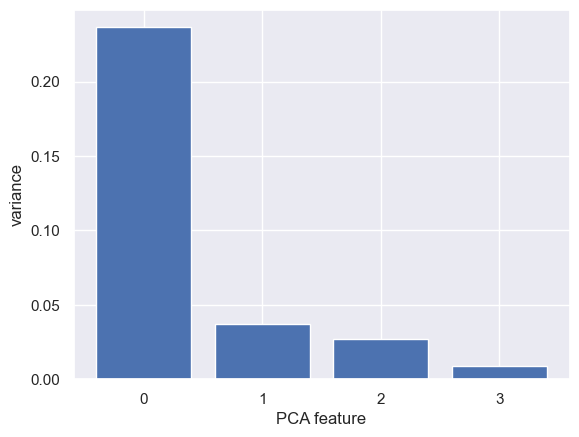

In [73]:
plt.bar(features, pca.explained_variance_)
plt.xticks(features)
plt.ylabel('variance')
plt.xlabel('PCA feature')
plt.show()

## Dimensionality Reduction of Iris Dataset

In [74]:
import numpy as np

In [75]:
species = iris.target

In [76]:
species

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [77]:
pca = PCA(n_components=2)
pca.fit(data)

PCA(n_components=2)

In [78]:
transformed = pca.transform(data)
transformed.shape

(150, 2)

In [79]:
from sklearn.cluster import KMeans

In [80]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(transformed)

/Users/samuelspeller/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [81]:
y_labels = kmeans.predict(transformed)
print(y_labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


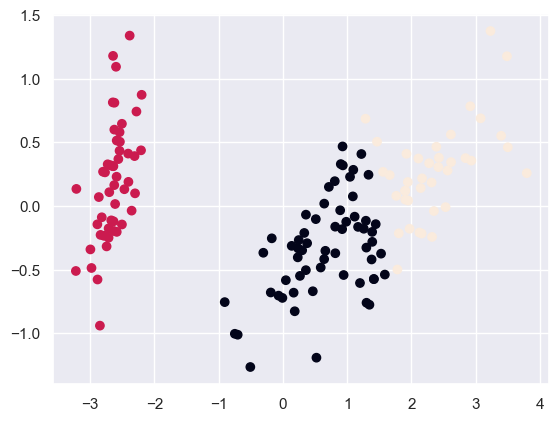

In [82]:
xs = transformed[:,0]
ys = transformed[:,1]
plt.scatter(xs, ys, c=y_labels)

In [83]:
plt.style.use('ggplot')

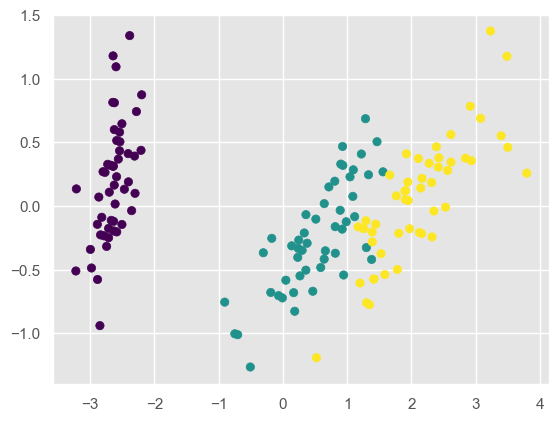

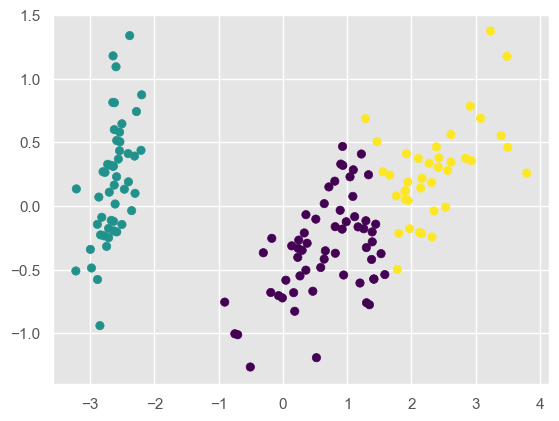

In [84]:
xs = transformed[:,0]
ys = transformed[:,1]
plt.scatter(xs, ys, c=species, cmap='viridis')

plt.show()
xs = transformed[:,0]
ys = transformed[:,1]
plt.scatter(xs, ys, c=y_labels,cmap='viridis')
plt.show()

In [85]:
kmeans2 = KMeans(n_clusters=3)
kmeans2.fit(iris['data'])
y_pred2 = kmeans2.predict(iris['data'])

/Users/samuelspeller/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


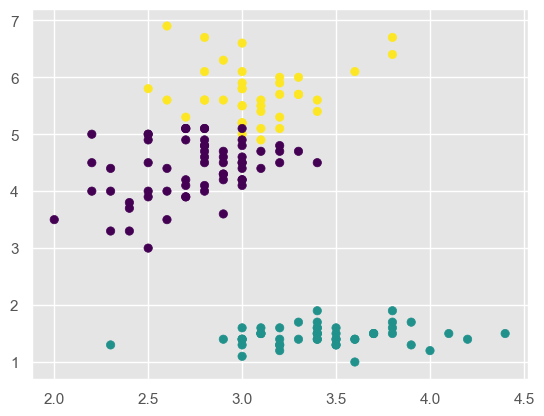

In [86]:
xs = iris['data'][:,1]
ys = iris['data'][:,2]
plt.scatter(xs, ys, c=y_pred2,cmap='viridis')
plt.show()

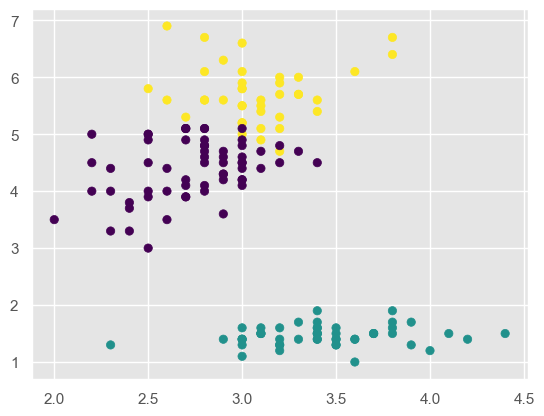

In [87]:
xs = iris['data'][:,1]
ys = iris['data'][:,2]
plt.scatter(xs, ys, c=y_labels,cmap='viridis')
plt.show()